# PHYS 2211L - Principles of Physics Laboratory I

### Laboratory Advanced Sheet
### Acceleration Due to Gravity

_____
_____

**Objectives**. The objectives of this laboratory are
* To measure the local value of the acceleration due to gravity.
* To introduce scientific graphing.
* To introduce linear regression as a method for determining uncertainty.


**Theory**. 
* General. Neglecting air resistance, an object dropped near the surface of the Earth falls with constant acceleration due to gravity. The local value of the acceleration due to gravity can be determined from knowledge of the displacement of the object as a function of the time of fall.
* Model. The general expression for the position of an object undergoing one-dimensional motion with constant acceleration is

>$$y_f = y_i + v_{yi}t + \frac{1}{2}a_yt^2$$

>where
>>$y_f$ is the position of the object at time $t$,  
$y_i$ is the initial position of the object (at time $t$ = 0),  
$v_{yi}$ is the initial velocity of the object (at time $t$ = 0), and  
$a_y$ is the constant acceleration of the object.

For the case of an object released from rest near the surface of the Earth and neglecting the effects of air resistance, the general expression becomes

>$$y_f = y_i - \frac{1}{2}gt^2$$

>where
>>$g$ is the local value of the acceleration due to gravity. The minus sign reflects the selection of the direction away from the center of the Earth as positive. The origin of the coordinate system is at the point where the object ends its fall.

In this experiment, a metal ball will be released from rest. Using y=0 at the point where the ball strikes a sensor surface:

>$$y_i = \frac{1}{2}gt^2$$

If multiple release heights are selected and times of fall recorded for each, a graph of initial position ( y0) versus time squared (t2) is a straight line with slope equal to g/2 and intercept equal to zero.

* Testing the model. The experimental methods described below will provide values of the time of fall of the metal ball for a variety of initial positions. A linear, least squares fit to the initial position versus time squared data pairs is made to determine the slope (m). The acceleration due to gravity is calculated from the results for the slope:

>$$g = 2m$$
>$$\delta g = 2 \delta m$$

**Apparatus and experimental procedures**.
* Equipment.
    1. Free fall adapter
    2. Metal ball.
    3. Rods and clamps.
    4. Meter stick.
    5. Computer interface.
    6. Computer.
* Experimental setup. The experimental setup for the experiment is shown in Figure 1 (to be provided by the student).
* Capabilities. 
    1. Free fall adapter. This device provides a clamp release mechanism to hold a metal ball at a desired height above a receptor. When the ball is released a timer is started. When the two plates of the receptor make contact as a result of being struck by the ball, the timer is stopped. The elapsed time is provided to the computer interface device.
    2. Metal ball. The metal ball serves as the object to be dropped. The ball provides an electrical contact, which when broken when the ball is released starts a timer. The ball should strike the center of the receptor.
    3. Rods and clamps. Rods and clamps are used to position the ball release mechanism above the receptor plates.
    4. Meter stick. The meter stick is used to measure the height of the bottom of the ball above the top receptor plate.
    5. Computer interface. The computer interface receives data from the free fall adapter. This information is then sent to the computer for display.
    6. Computer. The computer receives the time of fall data and displays it using the Scientific WorkshopTM software.
* Procedures. Detailed instructions are provided in paragraph 4b below.


**Requirements**.
* In the laboratory.
    1. Your instructor will introduce you to the equipment to be used in the experiment.
    2. Initial position versus time of fall data will be taken for the metal ball and will be recorded in the data table provided in Annex A.
    3. The data will be entered into an ExcelTM spreadsheet. A graph of initial position versus time of fall squared will be produced. A linear regression of the initial positions versus time of fall squared will be computed using the trend line feature of ExcelTM.
* After the laboratory. The items listed below will be turned in at the beginning of the next laboratory period. A complete laboratory report is not required for this laboratory.

**Para. 3. Apparatus and experimental procedures**. Provide a diagram of the apparatus used in the experiment.

**Para. 4. Data**.	
1. Provide your original data table (Annex A).
2. Provide a copy of your completed spreadsheet, providing data and the calculations and graph indicated below.
    1. A table of the data and calculations including columns for raw data (initial position and time of fall) and time of fall squared.
    2. A table for the linear regression of initial position versus time of fall squared.
    3. Calculations of the local value of the acceleration due to gravity and its uncertainty.
    4. Calculations of the percent fractional error and percent discrepancy in your results.
    5. A graph of position versus time after release squared that shows:
        1. The measured initial positions versus time of fall squared as data points, and
        2. The regressed initial position versus time of fall squared as a straight line.
    
**Para. 5. Results and Conclusions**.

1. **Results**. Provide the following information in your results paragraph.
    1. A statement providing the measured value of the local value of the acceleration due to gravity.
    2. A statement providing the percent fractional error and percent discrepancy in your results.
2. **Conclusions**.
    1. Assess the precision and accuracy of your experiment. State whether systematic or random error dominates.
    2. Describe sources of systematic error and random error in the experiment.



_____

### Diagram of the aparatus

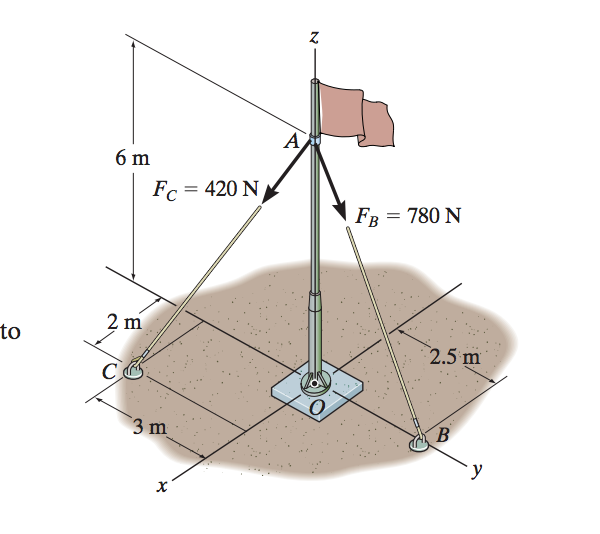

In [101]:
from IPython.display import Image
Image("/Users/tkrivosh/Desktop/Screen Shot 2016-01-28 at 10.59.23 PM.png")## this is a random image from my deskotop 

### Annex A - Data and Calculations

In [102]:
import scipy
from scipy import stats
import numpy as np
import pandas
import matplotlib.pyplot as plt
from IPython.display import Latex

% matplotlib inline

In [103]:
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    

#### Annex A - Data

In [104]:
import collections

# x = ((trial number,[initial height (in m),total time (in s)]),...)
x = ((1,[0.688,0.3762]),
     (2,[0.654,0.3655]),
     (3,[0.630,0.3609]),
     (4,[0.580,0.3451]),
     (5,[0.529,0.3300]),
     (6,[0.483,0.3147]),
     (7,[0.440,0.3006]),
     (8,[0.389,0.2829]),
     (9,[0.327,0.2594]),
     (10,[0.258,0.2294]))


# Creates an ordered dictionary of the form: x = {trial:[initial height,total time],...) 
x_ord_dict = collections.OrderedDict(x)


# Table of initial position, time of fall, and time of fall squared for each trial.
table = ListTable()
table.append(['trial',
              'initial position (m)',
              'time of fall (s)',
              'time of fall squared ($s^2$)'])
for item in x_ord_dict:
    trial = item
    x = x_ord_dict[item][0]
    t = x_ord_dict[item][1]
    z = (x_ord_dict[item][1])**2
    table.append([trial,x,t,z])
table

trial,initial position (m),time of fall (s),time of fall squared ($s^2$)
1,0.688,0.3762,0.14152644
2,0.654,0.3655,0.13359025
3,0.63,0.3609,0.13024881
4,0.58,0.3451,0.11909401
5,0.529,0.33,0.1089
6,0.483,0.3147,0.09903609
7,0.44,0.3006,0.09036036
8,0.389,0.2829,0.08003241
9,0.327,0.2594,0.06728836
10,0.258,0.2294,0.05262436


#### Graph

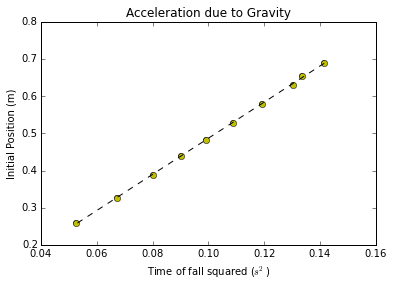

slope= 4.85536425568 m/s^2 uncertainty in slope= 0.0236737448476 m/s^2
r squared: 0.999809849405


In [108]:
x = [] # list of time of fall squared (in square seconds) for each trial.
y = [] # list of initial positions (in meters) for each trial.

for item in x_ord_dict:
    x.append((x_ord_dict[item][1])**2)
    y.append(x_ord_dict[item][0])

plt.scatter(x,y)
plt.title('Acceleration due to Gravity')
plt.xlabel('Time of fall squared ($s^2$)')
plt.ylabel('Initial Position (m)')
fit = np.polyfit(x,y,1)
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
plt.show()

print 'slope=',slope,'m/s^2', 'uncertainty in slope=', std_err,'m/s^2'
print'r squared:',(r_value)**2

#### Calculations of acceleration due to gravity 

In [109]:
m = slope # Slope of trendline .
err_m = std_err # Uncertainty in the slope.
g = m*2 # Acceleration due to gravity
err_g =err_m*2 # Uncertainty in calculated acceleration due to gravity.
disc = (g - 9.80)/9.80*100 # Percent discrepancy between measured and accepted values of the acceleration due to gravity.
frer=err_g/g*100
print 'acceleration due to gravity=', g, 'm/s^2', 'with the uncertainty of', err_g, 'm/s^2' 
print '%Disc=', disc,'%FE=',frer 

acceleration due to gravity= 9.71072851136 m/s^2 with the uncertainty of 0.0473474896951 m/s^2
%Disc= -0.910933557598 %FE= 0.48757917225


### Results

### Conclusions

_____
_____